In [1]:
# Importing necessary libraries
import os
import numpy as np
import tensorflow as tf
from keras import layers, models
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Set the path to your dataset and test dataset folders
dataset_path = 'TSR/train_dataset/train/'
test_dataset_path = 'TSR/test_dataset/test/'

# Define image size and batch size
img_size = (64, 64)
batch_size = 32


In [3]:
# Data preprocessing and augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


Found 4823 images belonging to 10 classes.
Found 1201 images belonging to 10 classes.


In [6]:
# Define the model architecture
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size[0], img_size[1], 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(train_generator.num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_generator, epochs=10, validation_data=validation_generator)


Epoch 1/10
151/151 [==============================] - 81s 528ms/step - loss: 1.2466 - accuracy: 0.6139 - val_loss: 0.7056 - val_accuracy: 0.7694
Epoch 2/10
151/151 [==============================] - 15s 100ms/step - loss: 0.7160 - accuracy: 0.7802 - val_loss: 0.5344 - val_accuracy: 0.8276
Epoch 3/10
151/151 [==============================] - 15s 98ms/step - loss: 0.5815 - accuracy: 0.8204 - val_loss: 0.4855 - val_accuracy: 0.8626
Epoch 4/10
151/151 [==============================] - 16s 105ms/step - loss: 0.4941 - accuracy: 0.8501 - val_loss: 0.4176 - val_accuracy: 0.8751
Epoch 5/10
151/151 [==============================] - 17s 112ms/step - loss: 0.4374 - accuracy: 0.8667 - val_loss: 0.3555 - val_accuracy: 0.8943
Epoch 6/10
151/151 [==============================] - 18s 117ms/step - loss: 0.3913 - accuracy: 0.8822 - val_loss: 0.3522 - val_accuracy: 0.8893
Epoch 7/10
151/151 [==============================] - 19s 124ms/step - loss: 0.3532 - accuracy: 0.8926 - val_loss: 0.3105 - val_acc

In [7]:
# Evaluate the model on the test set
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

evaluation = model.evaluate(test_generator)

# Print the evaluation metrics
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")
print(f"Test Loss: {evaluation[0]}")

Found 324 images belonging to 10 classes.
11/11 [==============================] - 5s 497ms/step - loss: 0.2493 - accuracy: 0.9383
Test Accuracy: 93.83%
Test Loss: 0.24931630492210388


In [8]:
# Get predictions and true labels for the test set
y_pred = np.argmax(model.predict(test_generator), axis=1)
y_true = test_generator.classes

11/11 [==============================] - 1s 71ms/step


In [9]:
# Generate and print the classification report
class_labels = list(test_generator.class_indices.keys())
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_labels))



Classification Report:
              precision    recall  f1-score   support

   GuideSign       0.21      0.24      0.23        62
          M1       0.00      0.00      0.00        14
          M4       0.56      0.56      0.56       169
          M5       0.00      0.00      0.00        12
          M6       0.00      0.00      0.00         8
          M7       0.08      0.08      0.08        25
          P1       0.08      0.07      0.07        14
      P10_50       0.00      0.00      0.00         6
         P12       0.00      0.00      0.00         6
          W1       0.14      0.12      0.13         8

    accuracy                           0.35       324
   macro avg       0.11      0.11      0.11       324
weighted avg       0.34      0.35      0.35       324



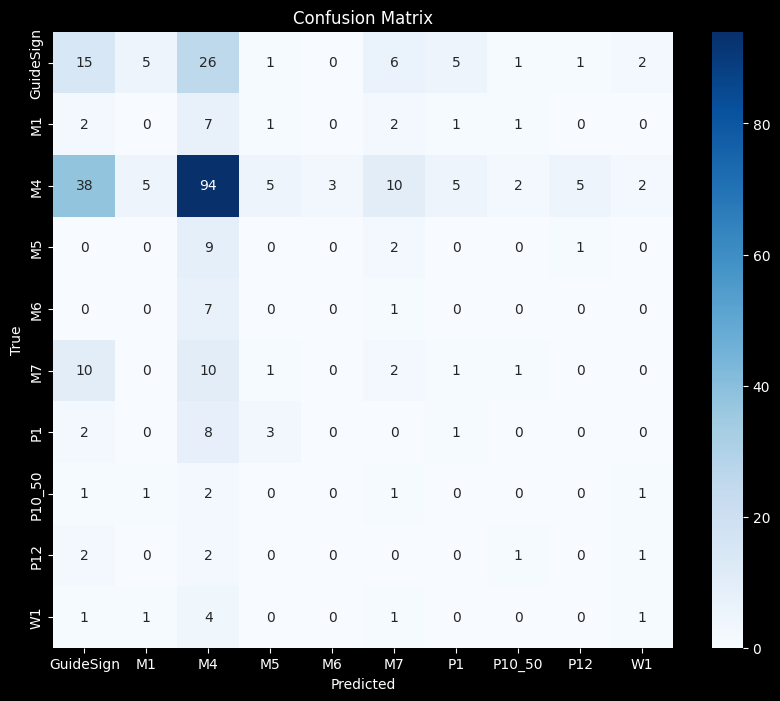

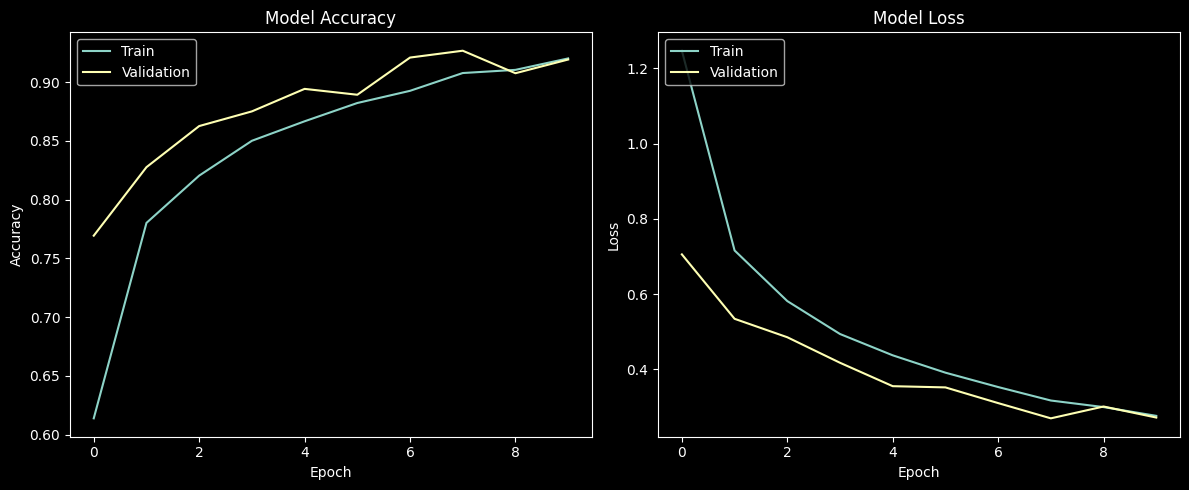

In [10]:
# Generate and plot the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Plot training history (accuracy and loss)
plt.figure(figsize=(12, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [11]:
# Print actual and predicted labels for each image
filenames = test_generator.filenames
for i in range(len(filenames)):
    print(f"Actual: {class_labels[y_true[i]]}, Predicted: {class_labels[y_pred[i]]}, File: {filenames[i]}")

Actual: GuideSign, Predicted: GuideSign, File: GuideSign\00004.jpg
Actual: GuideSign, Predicted: M4, File: GuideSign\00053.jpg
Actual: GuideSign, Predicted: P1, File: GuideSign\00055.jpg
Actual: GuideSign, Predicted: W1, File: GuideSign\00058.jpg
Actual: GuideSign, Predicted: P12, File: GuideSign\00074.jpg
Actual: GuideSign, Predicted: P10_50, File: GuideSign\00079.jpg
Actual: GuideSign, Predicted: M4, File: GuideSign\00117.jpg
Actual: GuideSign, Predicted: M4, File: GuideSign\00172.jpg
Actual: GuideSign, Predicted: M4, File: GuideSign\00175.jpg
Actual: GuideSign, Predicted: P1, File: GuideSign\00183.jpg
Actual: GuideSign, Predicted: M1, File: GuideSign\00206.jpg
Actual: GuideSign, Predicted: GuideSign, File: GuideSign\00216.jpg
Actual: GuideSign, Predicted: P1, File: GuideSign\00220.jpg
Actual: GuideSign, Predicted: M4, File: GuideSign\00252.jpg
Actual: GuideSign, Predicted: M4, File: GuideSign\00256.jpg
Actual: GuideSign, Predicted: GuideSign, File: GuideSign\00273.jpg
Actual: GuideS